In [1]:
import numpy as np  # Linear algebra
import pandas as pd  # Data processing, CSV file I/O (e.g. pd.read_csv)
import os

# Use a relative path to the dataset directory
dataset_dir = os.path.join(os.getcwd(), 'dataset')

# Walk through the dataset directory
for dirname, _, filenames in os.walk(dataset_dir):
    for filename in filenames:
        print(os.path.join(dirname, filename))


d:\Real Estate\House_Style_Project\House_style_ML\dataset\ML-AR-Chicago School\078f8f88971426ae729d919ce11e6942.jpg
d:\Real Estate\House_Style_Project\House_style_ML\dataset\ML-AR-Chicago School\0df505fa53491a9ac49ba2f00de22f2d.jpg
d:\Real Estate\House_Style_Project\House_style_ML\dataset\ML-AR-Chicago School\1d66809eff05a23dab38d79ec34777fc.jpg
d:\Real Estate\House_Style_Project\House_style_ML\dataset\ML-AR-Chicago School\20c478f272d5d14015eab8170563a454.jpg
d:\Real Estate\House_Style_Project\House_style_ML\dataset\ML-AR-Chicago School\3b6b2134568dd116206bf7ff59e7c1bd.jpg
d:\Real Estate\House_Style_Project\House_style_ML\dataset\ML-AR-Chicago School\4013de6cc22838cd0ab14fd242ecbd84.jpg
d:\Real Estate\House_Style_Project\House_style_ML\dataset\ML-AR-Chicago School\53b07aa2b907885a963ba95ee2ae1aa7.jpg
d:\Real Estate\House_Style_Project\House_style_ML\dataset\ML-AR-Chicago School\57a48b2cf75cac21cd042d06257d326f.jpg
d:\Real Estate\House_Style_Project\House_style_ML\dataset\ML-AR-Chicago 

In [2]:
import python_splitter
# If you want to create only Train-Test Folder(not Validation Folder)
# python_splitter.split_from_folder(r"D:\Real Estate\House_Style_Project\House_style_ML\dataset", train = 0.7, test = 0.3)
# Define the dataset folder relative to the script's current directory
# dataset_dir = os.path.join(os.getcwd(), 'dataset')

# Split the dataset into training and testing sets
# 70% training, 30% testing
python_splitter.split_from_folder(os.path.join(os.getcwd(), 'dataset'), train=0.7, test=0.3)

✅Checking SOURCE directory...
0.7 0 0.3
✅Checking percentage validation...
✅Making required directories...
✅Shuffling data...
✅Getting ready for copying files...

-------------Successfully splitted !!!--------------- 


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.applications import MobileNet
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [4]:
target_img_shape = (224,224)
# train_dir = r'D:\Real Estate\House_Style_Project\House_style_ML\Train_Test_Folder\train'
# val_dir = r'D:\Real Estate\House_Style_Project\House_style_ML\Train_Test_Folder\test'
# base_dir = os.path.join(os.getcwd(), 'Train_Test_Folder')

# Define train and validation directories
train_dir = os.path.join(os.path.join(os.getcwd(), 'Train_Test_Folder'), 'train')
val_dir = os.path.join(os.path.join(os.getcwd(), 'Train_Test_Folder'), 'test')

In [5]:
train_datagen = ImageDataGenerator(preprocessing_function = preprocess_input)
train_set = train_datagen.flow_from_directory(train_dir, target_size = target_img_shape, batch_size = 32, class_mode = 'sparse')

# #Augmenting training data with transformations
# train_datagen = ImageDataGenerator(
#     preprocessing_function=preprocess_input,
#     rotation_range=15,      # Randomly rotate images by 20 degrees
#     width_shift_range=0.3,  # Randomly shift images horizontally (15% of the width)
#     height_shift_range=0.3, # Randomly shift images vertically (15% of the height)
#     shear_range=0.9,       # Randomly apply shearing
#     zoom_range=0.1,        # Randomly zoom inside pictures
#     horizontal_flip=True,   # Randomly flip images horizontally
#     fill_mode='nearest'     # Fill pixels when the image is rotated or shifted
# )

# 
# = train_datagen.flow_from_directory(
#     train_dir, 
#     target_size=target_img_shape, 
#     batch_size=32, 
#     class_mode='sparse'
# )

val_datagen = ImageDataGenerator(preprocessing_function = preprocess_input)
val_set = val_datagen.flow_from_directory(val_dir, target_size = target_img_shape, batch_size = 32, class_mode = 'sparse')

Found 286 images belonging to 13 classes.
Found 129 images belonging to 13 classes.


In [6]:
print(train_set.class_indices)
for image_batch, labels_batch in train_set:
    print(image_batch.shape)
    print(labels_batch.shape)

    img = image_batch[0] - image_batch[0].min()
    img /= 275.0
    # plt.imshow(img)
    print('class', labels_batch[0])
    break

{'ML-AR-COLONIAL': 0, 'ML-AR-Chicago School': 1, 'ML-AR-Classic': 2, 'ML-AR-MEDITERRANEAN': 3, 'ML-AR-MID CENTURY': 4, 'ML-AR-Modern': 5, 'ML-AR-Modern Minimal': 6, 'ML-AR-Oriental': 7, 'ML-AR-SCANDINAVIAN': 8, 'ML-AR-THAI': 9, 'ML-AR-TRANSITIONAL': 10, 'ML-AR-TUDOR HOUSE': 11, 'ML-AR-VICTORIAN': 12}
(32, 224, 224, 3)
(32,)
class 5.0


In [7]:
ids, counts = np.unique(train_set.classes, return_counts = True)
print(ids)
print(counts)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12]
[20 20 20 20 26 11 20 20 20 37 20 32 20]


In [ ]:
labels = (train_set.class_indices)
labels = dict((v,k) for k,v in labels.items())
labels

for i in ids:
    print('{:>8} = {}'.format(labels[i], counts[i]))

ML-AR-COLONIAL = 20
ML-AR-Chicago School = 20
ML-AR-Classic = 20
ML-AR-MEDITERRANEAN = 20
ML-AR-MID CENTURY = 26
ML-AR-Modern = 11
ML-AR-Modern Minimal = 20
ML-AR-Oriental = 20
ML-AR-SCANDINAVIAN = 20
ML-AR-THAI = 37
ML-AR-TRANSITIONAL = 20
ML-AR-TUDOR HOUSE = 32
ML-AR-VICTORIAN = 20


# Mask generation process

In [9]:
import keras
from keras import layers
from keras import ops

import os
import numpy as np
from glob import glob
import cv2
from scipy.io import loadmat
import matplotlib.pyplot as plt

# For data preprocessing
from tensorflow import image as tf_image
from tensorflow import data as tf_data
from tensorflow import io as tf_io

In [10]:
import os
import cv2
import numpy as np
import tensorflow as tf

# Load the pretrained model
model = tf.keras.applications.MobileNetV2(weights='imagenet', include_top=False)

# Paths
train_image_dir = "Train_Test_Folder/train"
train_mask_dir = "Train_Test_Folder/train_mask"

val_image_dir = "Train_Test_Folder/test"
val_mask_dir = "Train_Test_Folder/test_mask"

# # Function to create masks for a given directory
# def predict_mask(image_path):
#     """Generate a segmentation mask for the given image."""
#     img = cv2.imread(image_path)
#     img = cv2.resize(img, (224, 224)) / 255.0
#     img = np.expand_dims(img, axis=0)

#     predictions = model.predict(img)
#     mask = np.argmax(predictions[0], axis=-1)  # Convert probabilities to class indices
#     return mask

# def process_images_in_class(image_dir, mask_dir):
#     """Process images in all subfolders of a given directory."""
#     # Create mask directory if it doesn't exist
#     os.makedirs(mask_dir, exist_ok=True)

#     for class_name in os.listdir(image_dir):
#         class_folder = os.path.join(image_dir, class_name)
#         if os.path.isdir(class_folder):
#             class_mask_dir = os.path.join(mask_dir, class_name)

#             # Create class-specific mask directory
#             os.makedirs(class_mask_dir, exist_ok=True)

#             for filename in os.listdir(class_folder):
#                 if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
#                     image_path = os.path.join(class_folder, filename)
#                     mask = predict_mask(image_path)
#                     mask_filename = os.path.join(class_mask_dir, os.path.splitext(filename)[0]+".png") #  + "_mask.png"
#                     cv2.imwrite(mask_filename, mask)

# # Parameters for resizing images (optional)
# IMG_HEIGHT = 224  # Adjust as needed
# IMG_WIDTH = 224   # Adjust as needed

# def generate_gray_masks(image_dir, mask_output_dir):
#     """
#     Generate grayscale segmentation masks for images.
#     """
#     print(image_dir)
#     print(mask_output_dir)
#     for filename in os.listdir(image_dir):
#         img_path = os.path.join(image_dir, filename)
        
#         # Read the image
#         img = cv2.imread(img_path)
#         if img is None:
#             print(f"Skipping invalid image: {filename}")
#             continue

#         # Convert the image to grayscale
#         gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        
#         # Normalize to ensure pixel values represent segmentation classes
#         gray_normalized = cv2.normalize(gray, None, alpha=0, beta=13, norm_type=cv2.NORM_MINMAX)

#         # Optionally resize the mask to standard dimensions
#         gray_resized = cv2.resize(gray_normalized, (IMG_WIDTH, IMG_HEIGHT))

#         # Save the generated mask
#         mask_filename = os.path.splitext(filename)[0] + ".png"
#         mask_path = os.path.join(mask_output_dir, mask_filename)
#         cv2.imwrite(mask_path, gray_resized)
        
        

#         print(f"Generated grayscale mask saved at: {mask_path}")

# Run the mask generation process
# generate_gray_masks(image_dir, mask_output_dir)

# print("Grayscale mask generation completed!")

# # Load the uploaded image
# image_path = r"D:\Real Estate\House_Style_Project\House_style_ML\mask\29d78067aa6d101b8acbc02177a99b36_gray_mask.png"
# image = cv2.imread(image_path)

# # Display the image
# plt.figure(figsize=(10, 5))
# plt.imshow(image, cmap='gray')
# plt.title("Uploaded Image in Grayscale")
# plt.axis("off")
# plt.show()

# Parameters for resizing images (optional)
IMG_HEIGHT = 224  # Adjust as needed
IMG_WIDTH = 224   # Adjust as needed

def generate_gray_mask(image_path, output_path):
    """
    Generate a grayscale segmentation mask for a single image.
    """
    # Read the image
    img = cv2.imread(image_path)
    if img is None:
        print(f"Skipping invalid image: {image_path}")
        return False

    # Convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Normalize to ensure pixel values represent segmentation classes
    gray_normalized = cv2.normalize(gray, None, alpha=0, beta=12, norm_type=cv2.NORM_MINMAX)

    # Optionally resize the mask to standard dimensions
    gray_resized = cv2.resize(gray_normalized, (IMG_WIDTH, IMG_HEIGHT))

    # Save the generated mask
    cv2.imwrite(output_path, gray_resized)
    print(f"Generated grayscale mask saved at: {output_path}")
    return True

def process_images_in_class(image_dir, mask_dir):
    """Process images in all subfolders of a given directory."""
    # Create mask directory if it doesn't exist
    os.makedirs(mask_dir, exist_ok=True)

    for class_name in os.listdir(image_dir):
        class_folder = os.path.join(image_dir, class_name)
        if os.path.isdir(class_folder):
            class_mask_dir = os.path.join(mask_dir, class_name)

            # Create class-specific mask directory
            os.makedirs(class_mask_dir, exist_ok=True)

            for filename in os.listdir(class_folder):
                if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif',)):
                    image_path = os.path.join(class_folder, filename)
                    mask_filename = os.path.splitext(filename)[0] + ".png"
                    mask_output_path = os.path.join(class_mask_dir, mask_filename)
                    
                    # Generate grayscale mask
                    success = generate_gray_mask(image_path, mask_output_path)
                    if not success:
                        print(f"Failed to process: {image_path}")

# Process training images
print("Processing training images...")
process_images_in_class(train_image_dir, train_mask_dir)

# Process validation images
print("Processing validation images...")
process_images_in_class(val_image_dir, val_mask_dir)

print("Segmentation masks for training and validation created successfully.")


C:\Users\Archiculture01\AppData\Local\Temp\ipykernel_20276\2597629301.py:7: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  model = tf.keras.applications.MobileNetV2(weights='imagenet', include_top=False)


Processing training images...
Generated grayscale mask saved at: Train_Test_Folder/train_mask\ML-AR-Chicago School\078f8f88971426ae729d919ce11e6942.png
Generated grayscale mask saved at: Train_Test_Folder/train_mask\ML-AR-Chicago School\0df505fa53491a9ac49ba2f00de22f2d.png
Generated grayscale mask saved at: Train_Test_Folder/train_mask\ML-AR-Chicago School\20c478f272d5d14015eab8170563a454.png
Generated grayscale mask saved at: Train_Test_Folder/train_mask\ML-AR-Chicago School\3b6b2134568dd116206bf7ff59e7c1bd.png
Generated grayscale mask saved at: Train_Test_Folder/train_mask\ML-AR-Chicago School\4013de6cc22838cd0ab14fd242ecbd84.png
Generated grayscale mask saved at: Train_Test_Folder/train_mask\ML-AR-Chicago School\5de08c7cf702f3583ead5ff3ab8b5a89.png
Generated grayscale mask saved at: Train_Test_Folder/train_mask\ML-AR-Chicago School\7dc67da5bedb18b15a53daa8e6312939.png
Generated grayscale mask saved at: Train_Test_Folder/train_mask\ML-AR-Chicago School\954a607459fe6c86d449b2e2eca10d8

In [11]:
# import glob

# # Load image and mask paths
# train_image_paths = sorted(glob.glob(f"{train_dir}/*/*.jpg"))
# train_mask_paths = [path.replace("train", "mask").replace(".jpg", ".png") for path in train_image_paths]

# # Example: Print the first image-mask pair
# for img_path, mask_path in zip(train_image_paths, train_mask_paths):
#     print(f"Image: {img_path}, Mask: {mask_path}")


In [12]:
import glob

IMAGE_SIZE = 224
BATCH_SIZE = 4
NUM_CLASSES = 13
# DATA_DIR = "./instance-level_human_parsing/instance-level_human_parsing/Training"
# NUM_TRAIN_IMAGES = 1000
# NUM_VAL_IMAGES = 50

train_images = train_image_dir
train_masks = train_mask_dir
val_images = val_image_dir
val_masks = val_mask_dir

def change_symbol(train_image_paths):
    # Normalize paths to use forward slashes
    return [os.path.normpath(path).replace(os.path.sep, '/') for path in train_image_paths]
# Load image and mask paths
train_image_paths = change_symbol(sorted(glob.glob(f"{train_images}/**/*")))
# train_mask_paths = change_symbol(sorted(glob.glob(f"{train_masks}/**/*.png")))
train_mask_paths = change_symbol(
    sorted(glob.glob(f"{train_masks}/**/*.png", recursive=True) + 
           glob.glob(f"{train_masks}/**/*.jpg", recursive=True))
)
val_image_paths = change_symbol(sorted(glob.glob(f"{val_images}/**/*")))
val_mask_paths = change_symbol(sorted(glob.glob(f"{val_masks}/**/*.png")))

def read_image(image_path, mask=False):
    image = tf_io.read_file(image_path)
    if mask:
        image = tf_image.decode_png(image, channels=1)
        image.set_shape([None, None, 1])
        image = tf_image.resize(images=image, size=[IMAGE_SIZE, IMAGE_SIZE])
    else:
        image = tf_image.decode_png(image, channels=3)
        image.set_shape([None, None, 3])
        image = tf_image.resize(images=image, size=[IMAGE_SIZE, IMAGE_SIZE])
    return image


def load_data(image_list, mask_list):
    image = read_image(image_list)
    mask = read_image(mask_list, mask=True)
    return image, mask


def data_generator(image_list, mask_list):
    dataset = tf_data.Dataset.from_tensor_slices((image_list, mask_list))
    dataset = dataset.map(load_data, num_parallel_calls=tf_data.AUTOTUNE)
    dataset = dataset.batch(BATCH_SIZE, drop_remainder=True)
    return dataset



train_dataset = data_generator(train_image_paths, train_mask_paths)
val_dataset = data_generator(val_image_paths, val_mask_paths)

# def preprocess_labels(labels):
#     return tf.squeeze(labels, axis=-1)  # Remove the last dimension if it's 1
#     # Optionally cast to int32 if not integers
#     return tf.cast(labels, tf.int32)

# train_dataset = train_dataset.map(lambda x, y: (x, preprocess_labels(y)))
# val_dataset = val_dataset.map(lambda x, y: (x, preprocess_labels(y)))

# train_dataset = data_generator(train_image_paths, train_mask_paths, batch_size=4)
# val_dataset = data_generator(val_image_paths, val_mask_paths, batch_size=4)


print("Train Dataset:", train_dataset)
print("Val Dataset:", val_dataset)

Train Dataset: <_BatchDataset element_spec=(TensorSpec(shape=(4, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(4, 224, 224, 1), dtype=tf.float32, name=None))>
Val Dataset: <_BatchDataset element_spec=(TensorSpec(shape=(4, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(4, 224, 224, 1), dtype=tf.float32, name=None))>


In [13]:
train_dataset

<_BatchDataset element_spec=(TensorSpec(shape=(4, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(4, 224, 224, 1), dtype=tf.float32, name=None))>

In [14]:
print(len(train_image_paths))
print(len(train_mask_paths))

286
286


In [15]:
def convolution_block(
    block_input,
    num_filters=256,
    kernel_size=3,
    dilation_rate=1,
    use_bias=False,
):
    x = layers.Conv2D(
        num_filters,
        kernel_size=kernel_size,
        dilation_rate=dilation_rate,
        padding="same",
        use_bias=use_bias,
        kernel_initializer=keras.initializers.HeNormal(),
    )(block_input)
    x = layers.BatchNormalization()(x)
    return ops.nn.relu(x)


def DilatedSpatialPyramidPooling(dspp_input):
    dims = dspp_input.shape
    x = layers.AveragePooling2D(pool_size=(dims[-3], dims[-2]))(dspp_input)
    x = convolution_block(x, kernel_size=1, use_bias=True)
    out_pool = layers.UpSampling2D(
        size=(dims[-3] // x.shape[1], dims[-2] // x.shape[2]),
        interpolation="bilinear",
    )(x)

    out_1 = convolution_block(dspp_input, kernel_size=1, dilation_rate=1)
    out_6 = convolution_block(dspp_input, kernel_size=3, dilation_rate=6)
    out_12 = convolution_block(dspp_input, kernel_size=3, dilation_rate=12)
    out_18 = convolution_block(dspp_input, kernel_size=3, dilation_rate=18)

    x = layers.Concatenate(axis=-1)([out_pool, out_1, out_6, out_12, out_18])
    output = convolution_block(x, kernel_size=1)
    return output

In [16]:
def DeeplabV3Plus(image_size, num_classes):
    model_input = keras.Input(shape=(image_size, image_size, 3))
    preprocessed = keras.applications.resnet50.preprocess_input(model_input)
    resnet50 = keras.applications.ResNet50(
        weights="imagenet", include_top=False, input_tensor=preprocessed
    )
    x = resnet50.get_layer("conv4_block6_2_relu").output
    x = DilatedSpatialPyramidPooling(x)

    input_a = layers.UpSampling2D(
        size=(image_size // 4 // x.shape[1], image_size // 4 // x.shape[2]),
        interpolation="bilinear",
    )(x)
    input_b = resnet50.get_layer("conv2_block3_2_relu").output
    input_b = convolution_block(input_b, num_filters=48, kernel_size=1)

    x = layers.Concatenate(axis=-1)([input_a, input_b])
    x = convolution_block(x)
    x = convolution_block(x)
    x = layers.UpSampling2D(
        size=(image_size // x.shape[1], image_size // x.shape[2]),
        interpolation="bilinear",
    )(x)
    model_output = layers.Conv2D(num_classes, kernel_size=(1, 1), padding="same")(x)
    return keras.Model(inputs=model_input, outputs=model_output)


model = DeeplabV3Plus(image_size=IMAGE_SIZE, num_classes=NUM_CLASSES)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item (GetItem)  │ (None, 224, 224)  │          0 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_1          │ (None, 224, 224)  │          0 │ input_layer_1[0]… │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_2          │ (None, 224, 224)  │          0 │ input_layer_1[0]… │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stack (Stack)       │ (None, 224, 224,  │          0 │ get_item[0][0],   │
│                     │ 3)                │            │ get_item_1[0][0], │
│                     │                   │            │ get_item_2[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 224, 224,  │          0 │ stack[0][0]       │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ add[0][0]         │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c

 Total params: 11,855,437 (45.22 MB)

 Trainable params: 11,822,701 (45.10 MB)

 Non-trainable params: 32,736 (127.88 KB)

In [17]:
# Train Dataset: <_BatchDataset element_spec=(TensorSpec(shape=(4, 512, 512, 3), dtype=tf.float32, name=None), TensorSpec(shape=(4, 512, 512, 1), dtype=tf.float32, name=None))>
train_dataset
for images, labels in train_dataset: 
    print("Image shape:", images.shape)
    print("Label shape:", labels.shape)
    print("Label dtype:", labels.dtype)

Image shape: (4, 224, 224, 3)
Label shape: (4, 224, 224, 1)
Label dtype: <dtype: 'float32'>
Image shape: (4, 224, 224, 3)
Label shape: (4, 224, 224, 1)
Label dtype: <dtype: 'float32'>
Image shape: (4, 224, 224, 3)
Label shape: (4, 224, 224, 1)
Label dtype: <dtype: 'float32'>
Image shape: (4, 224, 224, 3)
Label shape: (4, 224, 224, 1)
Label dtype: <dtype: 'float32'>
Image shape: (4, 224, 224, 3)
Label shape: (4, 224, 224, 1)
Label dtype: <dtype: 'float32'>
Image shape: (4, 224, 224, 3)
Label shape: (4, 224, 224, 1)
Label dtype: <dtype: 'float32'>
Image shape: (4, 224, 224, 3)
Label shape: (4, 224, 224, 1)
Label dtype: <dtype: 'float32'>
Image shape: (4, 224, 224, 3)
Label shape: (4, 224, 224, 1)
Label dtype: <dtype: 'float32'>
Image shape: (4, 224, 224, 3)
Label shape: (4, 224, 224, 1)
Label dtype: <dtype: 'float32'>
Image shape: (4, 224, 224, 3)
Label shape: (4, 224, 224, 1)
Label dtype: <dtype: 'float32'>
Image shape: (4, 224, 224, 3)
Label shape: (4, 224, 224, 1)
Label dtype: <dtype:

Epoch 1/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 157s 2s/step - accuracy: 0.1403 - loss: 3.3002 - val_accuracy: 0.0990 - val_loss: 47179.5195
Epoch 2/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 134s 2s/step - accuracy: 0.2012 - loss: 2.0858 - val_accuracy: 0.1155 - val_loss: 5.8956
Epoch 3/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 136s 2s/step - accuracy: 0.2467 - loss: 1.9386 - val_accuracy: 0.1276 - val_loss: 3.5234
Epoch 4/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 136s 2s/step - accuracy: 0.2544 - loss: 1.8483 - val_accuracy: 0.2078 - val_loss: 2.4859
Epoch 5/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 130s 2s/step - accuracy: 0.2782 - loss: 1.7880 - val_accuracy: 0.2148 - val_loss: 2.4188
Epoch 6/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 127s 2s/step - accuracy: 0.2866 - loss: 1.7688 - val_accuracy: 0.1700 - val_loss: 4.2320
Epoch 7/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 129s 2s/step - accuracy: 0.2963 - loss: 1.7417 - val_accuracy: 0.2176 - val_loss: 2.7204
Epoch 8/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 134s 2s/step - accuracy: 0.3071 - loss: 1.7044 - val_accuracy: 0.2453

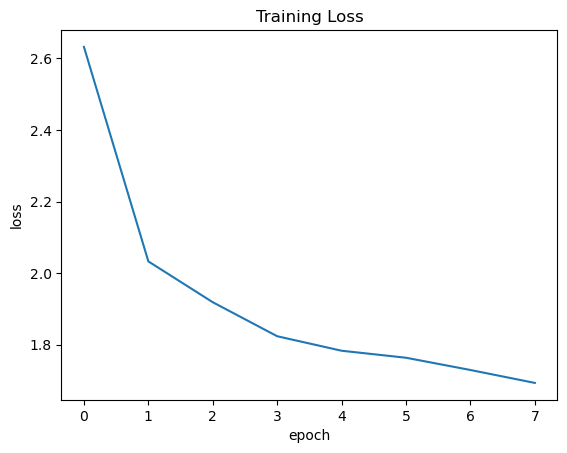

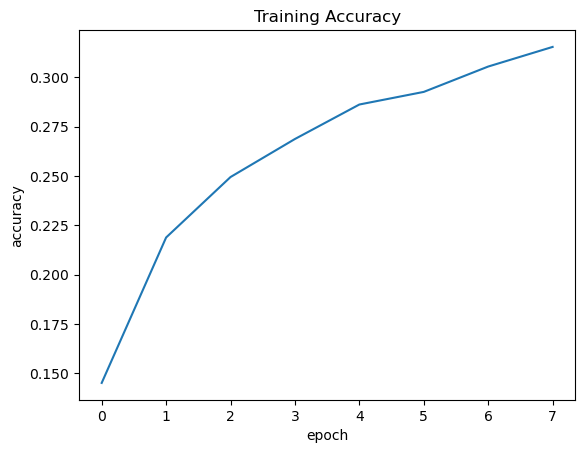

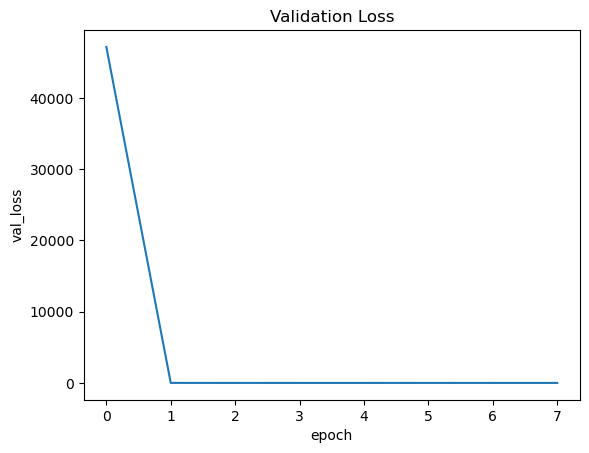

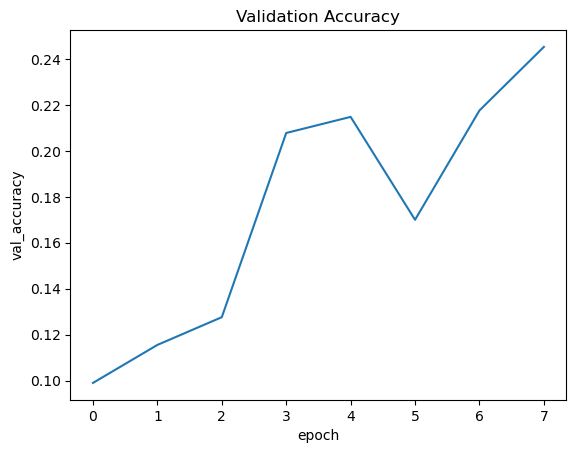

In [106]:
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.1),
    loss=loss,
    metrics=["accuracy"],
)

history = model.fit(train_dataset, validation_data=val_dataset, epochs=25,callbacks=[EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)])

plt.plot(history.history["loss"])
plt.title("Training Loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.show()

plt.plot(history.history["accuracy"])
plt.title("Training Accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.show()

plt.plot(history.history["val_loss"])
plt.title("Validation Loss")
plt.ylabel("val_loss")
plt.xlabel("epoch")
plt.show()

plt.plot(history.history["val_accuracy"])
plt.title("Validation Accuracy")
plt.ylabel("val_accuracy")
plt.xlabel("epoch")
plt.show()

In [107]:
# !pip install tensorflow==2.7 
CLASSES = list(train_set.class_indices.keys())
print(CLASSES)
# This is used to map between string class to index.
CLASS_TO_INDEX = {name: index for index, name in enumerate(CLASSES)}
print(CLASS_TO_INDEX)



['ML-AR-COLONIAL', 'ML-AR-Chicago School', 'ML-AR-Classic', 'ML-AR-MEDITERRANEAN', 'ML-AR-MID CENTURY', 'ML-AR-Modern', 'ML-AR-Modern Minimal', 'ML-AR-Oriental', 'ML-AR-SCANDINAVIAN', 'ML-AR-THAI', 'ML-AR-TRANSITIONAL', 'ML-AR-TUDOR HOUSE', 'ML-AR-VICTORIAN']
{'ML-AR-COLONIAL': 0, 'ML-AR-Chicago School': 1, 'ML-AR-Classic': 2, 'ML-AR-MEDITERRANEAN': 3, 'ML-AR-MID CENTURY': 4, 'ML-AR-Modern': 5, 'ML-AR-Modern Minimal': 6, 'ML-AR-Oriental': 7, 'ML-AR-SCANDINAVIAN': 8, 'ML-AR-THAI': 9, 'ML-AR-TRANSITIONAL': 10, 'ML-AR-TUDOR HOUSE': 11, 'ML-AR-VICTORIAN': 12}


In [108]:
from scipy.io import savemat

# Generate a colormap for 13 classes (using unique RGB values)
# For simplicity, values are spaced evenly across the range
# num_classes = 13
# colormap_13_classes = np.linspace(0, 1, num_classes).reshape(-1, 1)
# colormap_13_classes = np.hstack([colormap_13_classes, 1 - colormap_13_classes, np.random.rand(num_classes, 1)])

import numpy as np

num_classes = 13

# Generate distinct colors for each class
colormap_13_classes = np.array([
    [1, 0, 0],      # Red
    [0, 1, 0],      # Green
    [0, 0, 1],      # Blue
    [1, 1, 0],      # Yellow
    [0, 1, 1],      # Cyan
    [1, 0, 1],      # Magenta
    [0.5, 0.5, 0.5],# Gray
    [1, 0.5, 0],    # Orange
    [0.5, 0, 0.5],  # Purple
    [0, 0.5, 0.5],  # Teal
    [0.5, 0.5, 0],  # Olive
    [0, 0, 0],      # Black
    [1, 1, 1]       # White
])

print("Colormap for 13 classes:")
print(colormap_13_classes)

# Ensure the values are within the 0-1 range
colormap_13_classes = np.clip(colormap_13_classes, 0, 1)

# Save to .mat file
output_path = 'colormap_13_classes.mat'
savemat(output_path, {"colormap": colormap_13_classes})

output_path


Colormap for 13 classes:
[[1.  0.  0. ]
 [0.  1.  0. ]
 [0.  0.  1. ]
 [1.  1.  0. ]
 [0.  1.  1. ]
 [1.  0.  1. ]
 [0.5 0.5 0.5]
 [1.  0.5 0. ]
 [0.5 0.  0.5]
 [0.  0.5 0.5]
 [0.5 0.5 0. ]
 [0.  0.  0. ]
 [1.  1.  1. ]]


'colormap_13_classes.mat'

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


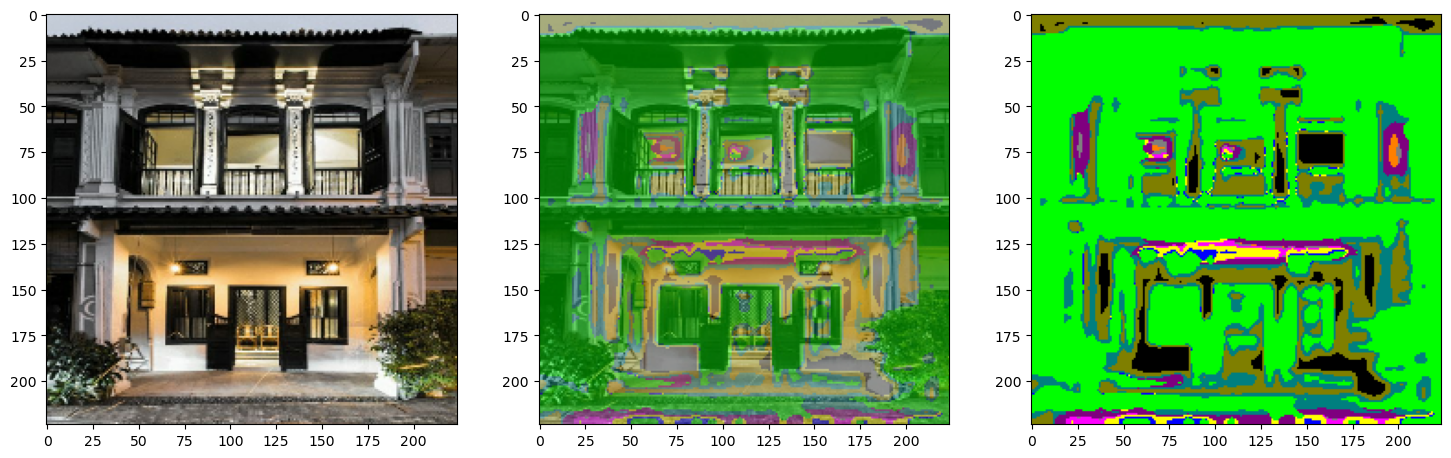

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


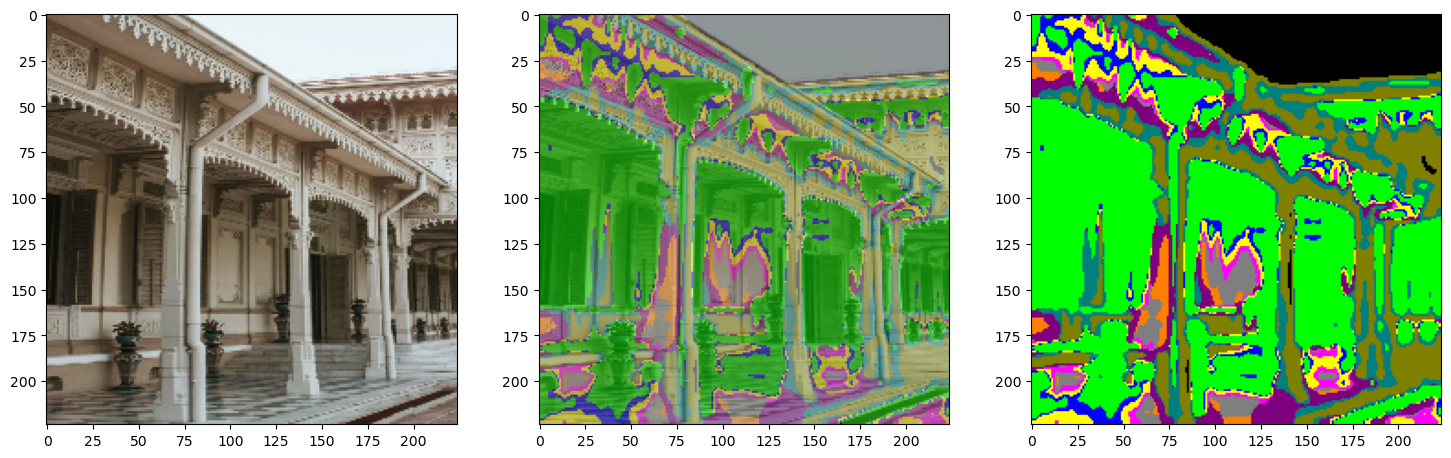

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


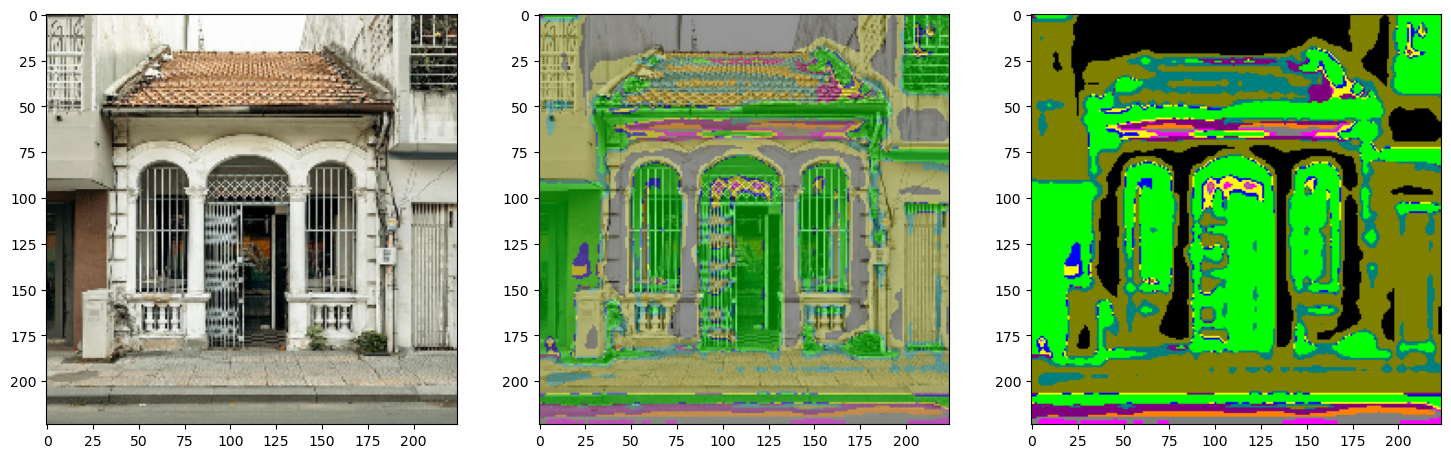

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


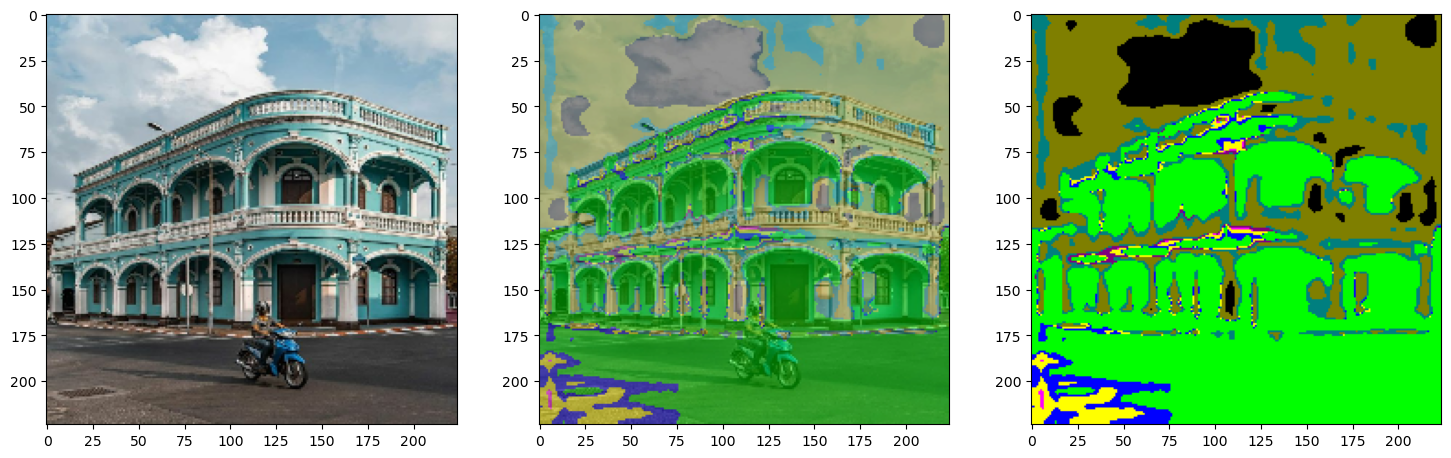

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


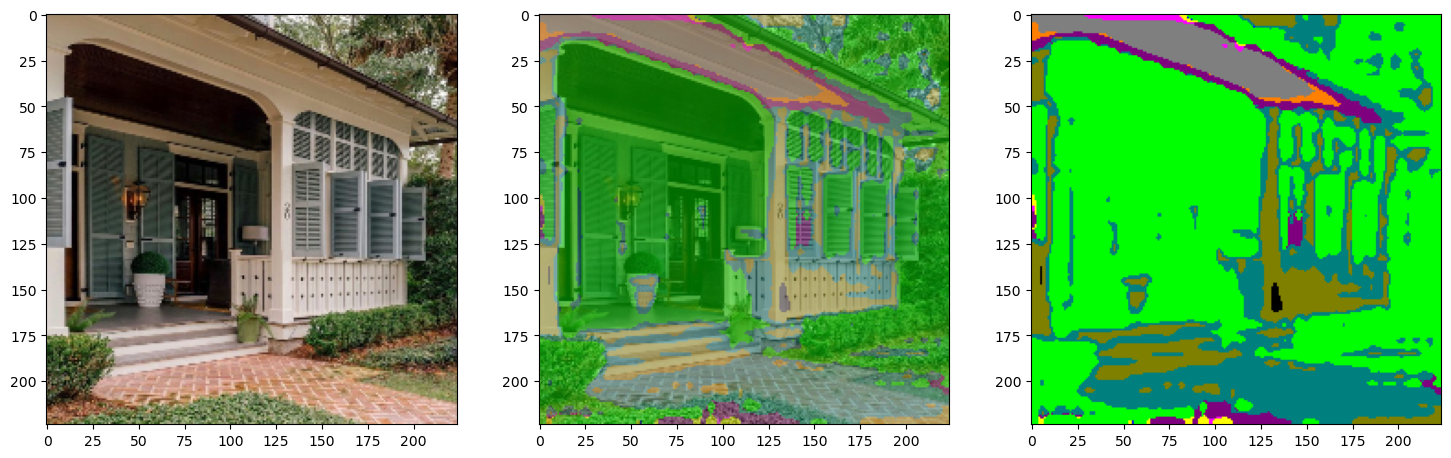

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


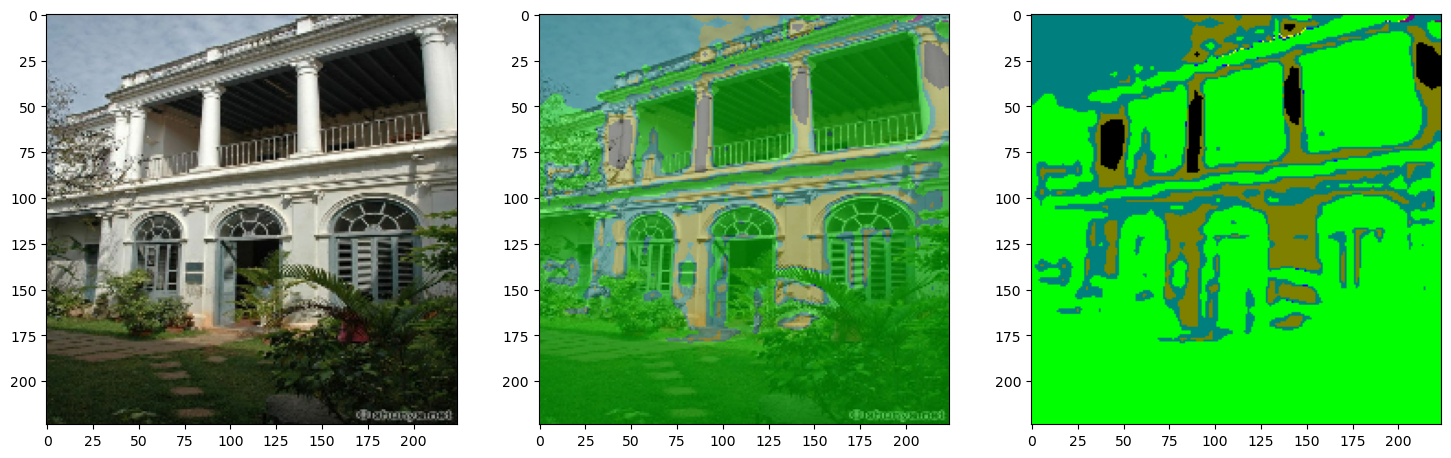

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


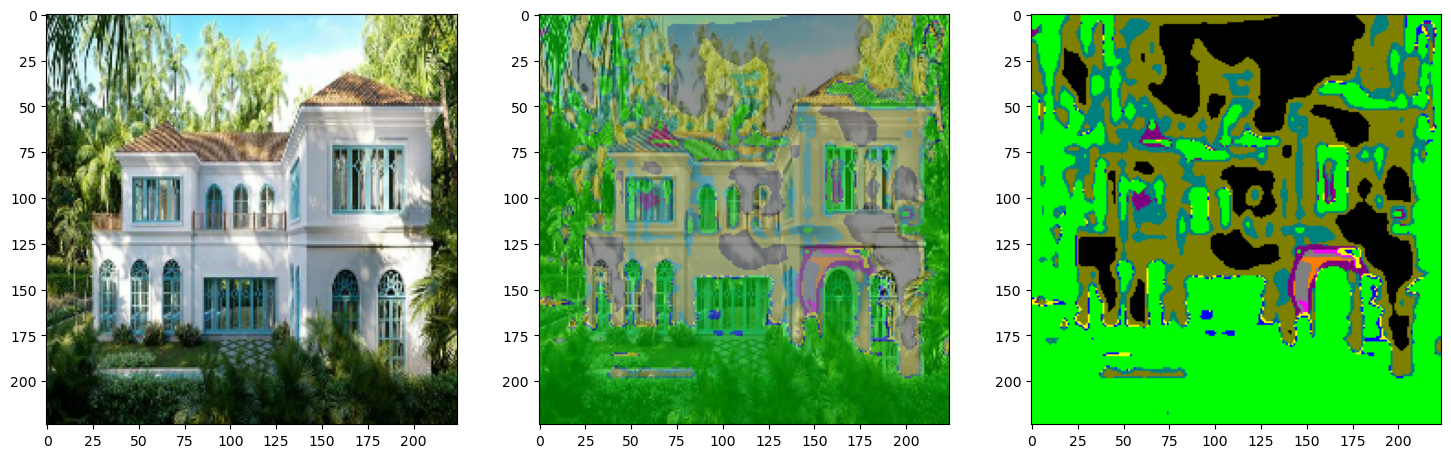

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


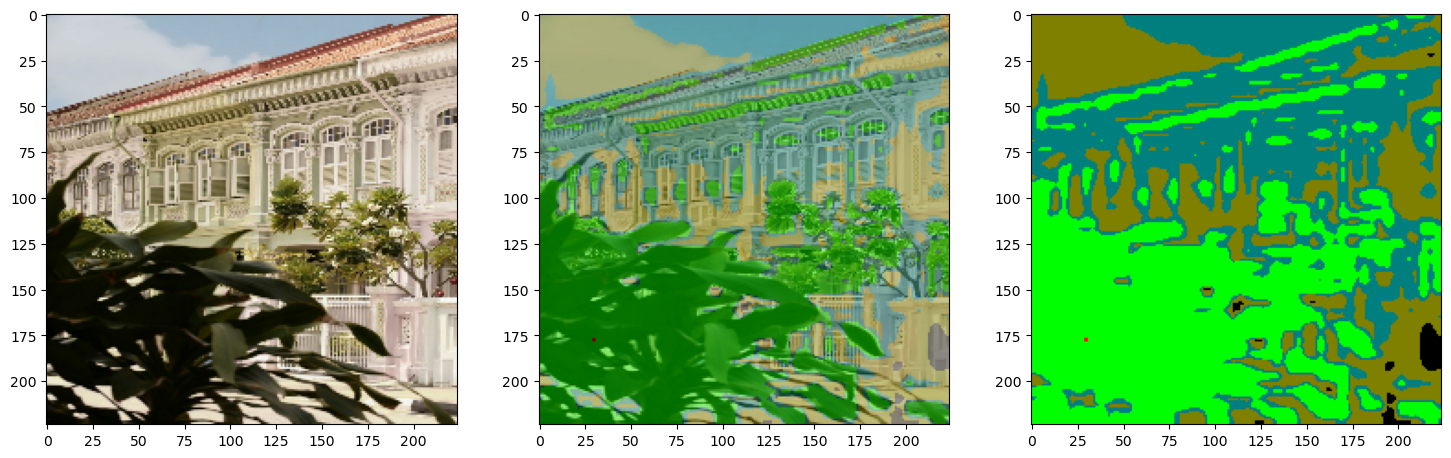

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


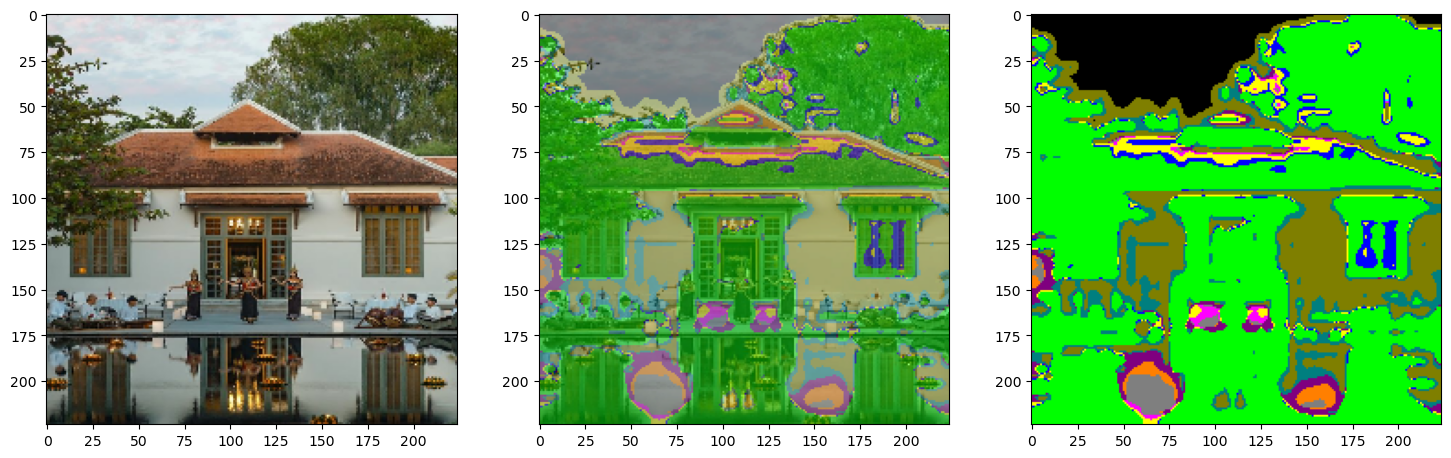

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


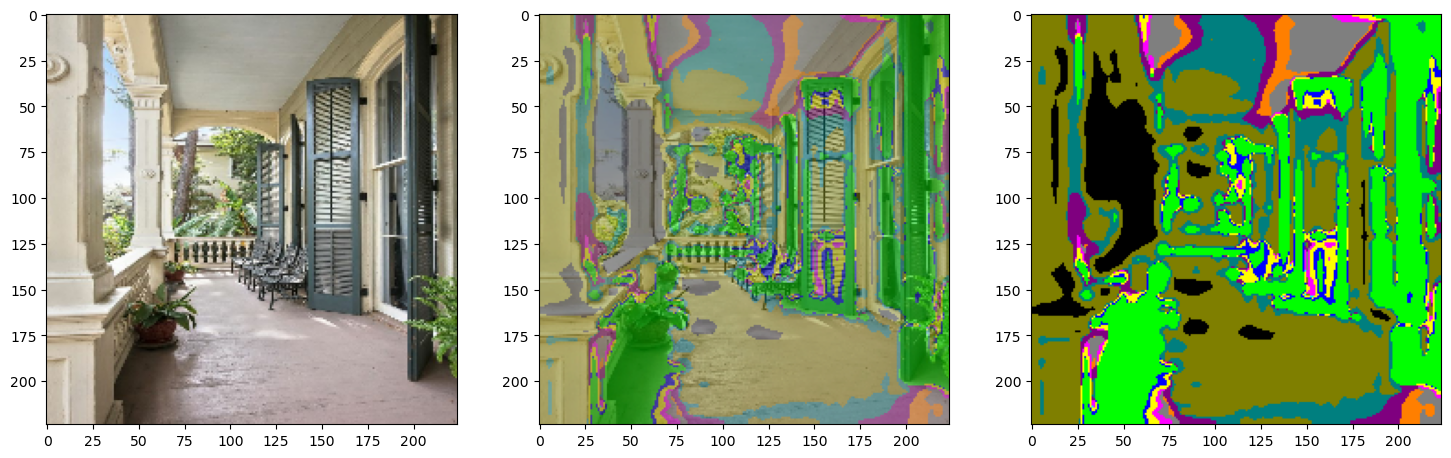

In [ ]:
# Loading the Colormap
colormap = loadmat(
    r"colormap_13_classes.mat"
)["colormap"]
colormap = colormap * 100
colormap = colormap.astype(np.uint8)
# print(colormap)

def infer(model, image_tensor):
    predictions = model.predict(np.expand_dims((image_tensor), axis=0))
    predictions = np.squeeze(predictions)
    predictions = np.argmax(predictions, axis=2)
    return predictions


def decode_segmentation_masks(mask, colormap, n_classes):
    r = np.zeros_like(mask).astype(np.uint8)
    g = np.zeros_like(mask).astype(np.uint8)
    b = np.zeros_like(mask).astype(np.uint8)
    for l in range(0, n_classes):
        idx = mask == l
        r[idx] = colormap[l, 0]
        g[idx] = colormap[l, 1]
        b[idx] = colormap[l, 2]
    rgb = np.stack([r, g, b], axis=2)
    return rgb


def get_overlay(image, colored_mask):
    image = keras.utils.array_to_img(image)
    image = np.array(image).astype(np.uint8)
    overlay = cv2.addWeighted(image, 0.35, colored_mask, 0.65, 0)
    return overlay

def plot_samples_matplotlib(display_list, figsize=(5, 3)):
    _, axes = plt.subplots(nrows=1, ncols=len(display_list), figsize=figsize)
    for i in range(len(display_list)):
        if display_list[i].shape[-1] == 3:
            axes[i].imshow(keras.utils.array_to_img(display_list[i]))
        else:
            axes[i].imshow(display_list[i])
    plt.show()


def plot_predictions(images_list, colormap, model):
    for image_file in images_list:
        image_tensor = read_image(image_file)
        prediction_mask = infer(image_tensor=image_tensor, model=model)
        prediction_colormap = decode_segmentation_masks(prediction_mask, colormap, 13) # กำหนด class ที่อยากทราบ n อันดับแรก
        overlay = get_overlay(image_tensor, prediction_colormap)
        plot_samples_matplotlib(
            [image_tensor, overlay, prediction_colormap], figsize=(18, 13)
        )

plot_predictions(train_image_paths[:10], colormap, model=model)

In [114]:
# plot_predictions(train_image_paths[:10], colormap, model=model)

In [2]:
import ipywidgets as widgets
from IPython.display import display
import cv2
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
from scipy.io import loadmat

# Load colormap
colormap = loadmat(r"colormap_13_classes.mat")["colormap"]
colormap = colormap * 100
colormap = colormap.astype(np.uint8)

# Define functions
def infer(model, image_tensor):
    predictions = model.predict(np.expand_dims(image_tensor, axis=0))
    predictions = np.squeeze(predictions)
    predictions = np.argmax(predictions, axis=2)
    return predictions

def decode_segmentation_masks(mask, colormap, n_classes):
    r = np.zeros_like(mask).astype(np.uint8)
    g = np.zeros_like(mask).astype(np.uint8)
    b = np.zeros_like(mask).astype(np.uint8)
    for l in range(0, n_classes):
        idx = mask == l
        r[idx] = colormap[l, 0]
        g[idx] = colormap[l, 1]
        b[idx] = colormap[l, 2]
    rgb = np.stack([r, g, b], axis=2)
    return rgb

def get_overlay(image, colored_mask):
    overlay = cv2.addWeighted(image, 0.35, colored_mask, 0.65, 0)
    return overlay

def plot_samples(display_list, titles):
    plt.figure(figsize=(15, 5))
    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i + 1)
        plt.title(titles[i])
        plt.imshow(display_list[i])
        plt.axis("off")
    plt.show()

# Dummy model (replace with your trained model)
# model = keras.models.load_model("path_to_your_trained_model.h5")

# Upload Widget
upload_button = widgets.FileUpload(accept=".jpg,.png,.jpeg", multiple=False)

def on_upload(change):
    for name, file_info in upload_button.value.items():
        # Load image
        file_bytes = np.frombuffer(file_info['content'], np.uint8)
        image = cv2.imdecode(file_bytes, cv2.IMREAD_COLOR)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        resized_image = cv2.resize(image, (224, 224))  # Adjust size if necessary
        image_tensor = resized_image / 255.0  # Normalize
        
        # Predict and visualize
        prediction_mask = infer(model=model, image_tensor=image_tensor)
        prediction_colormap = decode_segmentation_masks(prediction_mask, colormap, 13)
        overlay = get_overlay(resized_image, prediction_colormap)
        
        # Display results
        plot_samples(
            [image, overlay, prediction_colormap],
            ["Original Image", "Overlay", "Prediction Mask"]
        )

upload_button.observe(on_upload, names='value')
display(upload_button)


FileUpload(value={}, accept='.jpg,.png,.jpeg', description='Upload')

NameError: name 'model' is not defined